Downloading...
From: https://drive.google.com/uc?id=1LCDWNMmK5LDfnLK_f6yRwpeWF6kXE2DV
To: /content/buildings.csv
100%|██████████| 1.21M/1.21M [00:00<00:00, 86.9MB/s]


Etape 1 : Fichier charge avec succes

--- Apercu des donnees ---
   id  country  region  construction_period_start  construction_period_end  \
0   0  Austria  Vienna                        NaN                   1918.0   
1   1  Austria  Vienna                        NaN                   1918.0   
2   2  Austria  Vienna                        NaN                   1918.0   
3   3  Austria  Vienna                        NaN                   1918.0   
4   4  Austria  Vienna                        NaN                   1918.0   

       steel    copper  aluminum  unspecified_metal       wood  ...      R5.2  \
0   3.414460  0.162858  0.478091           0.181714  68.171870  ...  R5.2OECD   
1   8.300614  0.242198  0.073321           0.030977  89.491428  ...  R5.2OECD   
2  15.273336  0.200116  0.060582           0.025595  68.395222  ...  R5.2OECD   
3  11.111311  0.256902  0.077772           0.032858  48.212881  ...  R5.2OECD   
4  11.292124  0.266117  0.329761           0.034037  32.39745

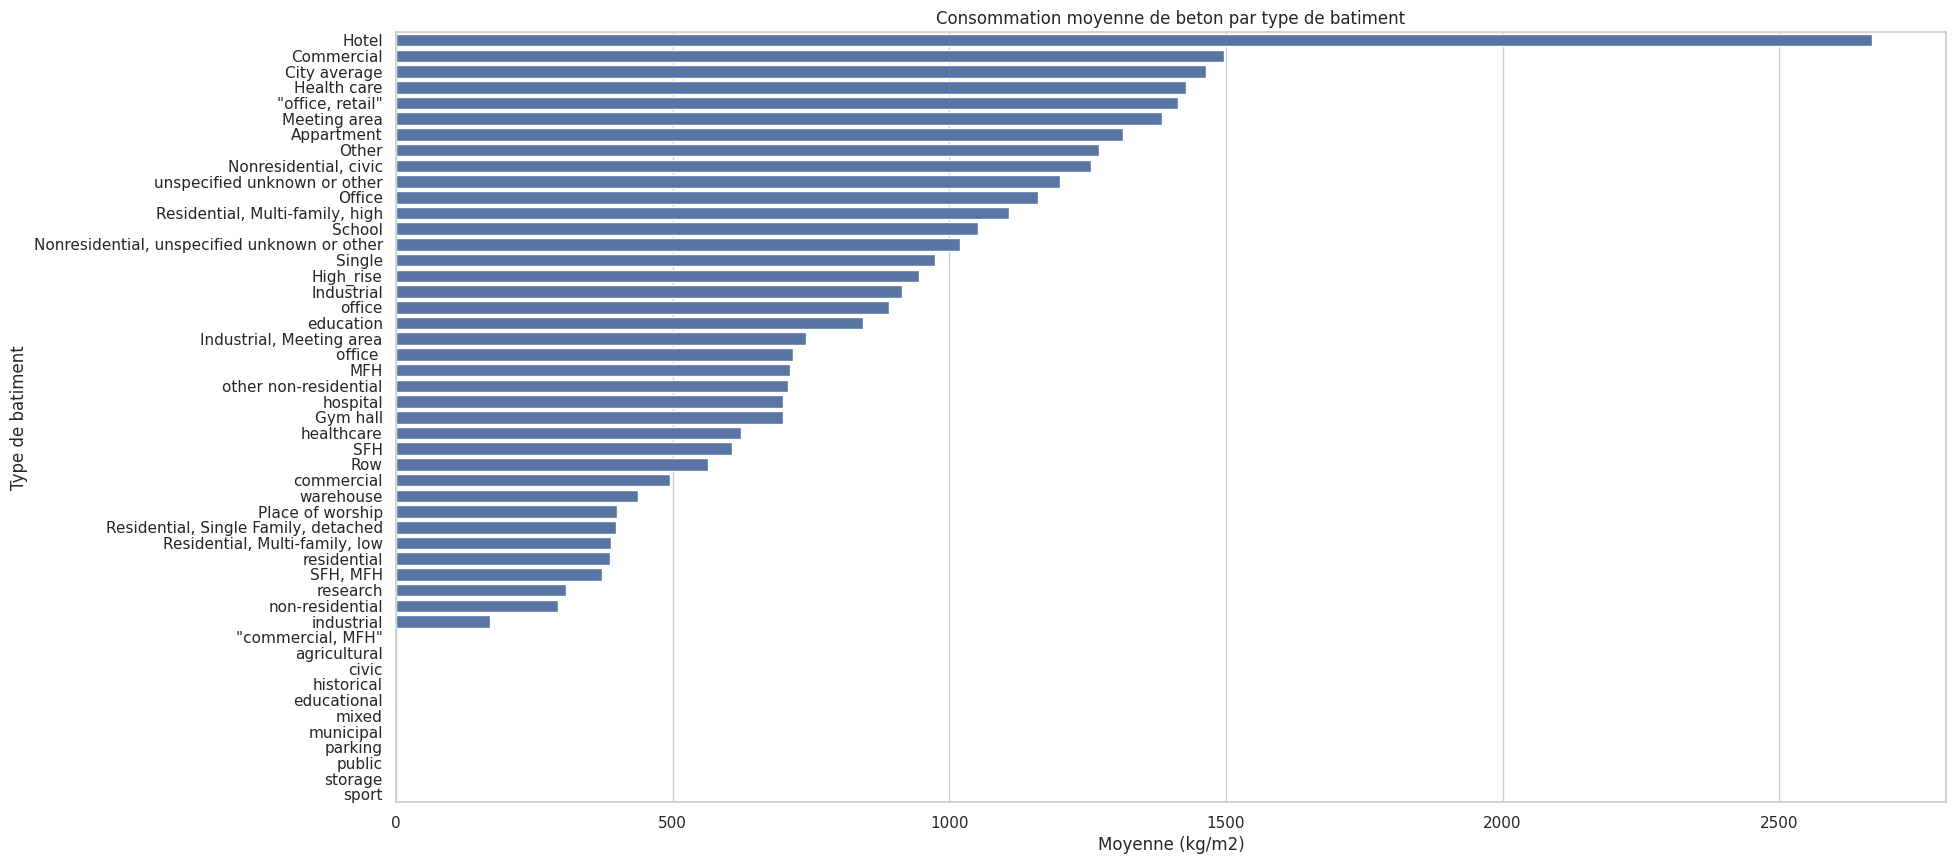

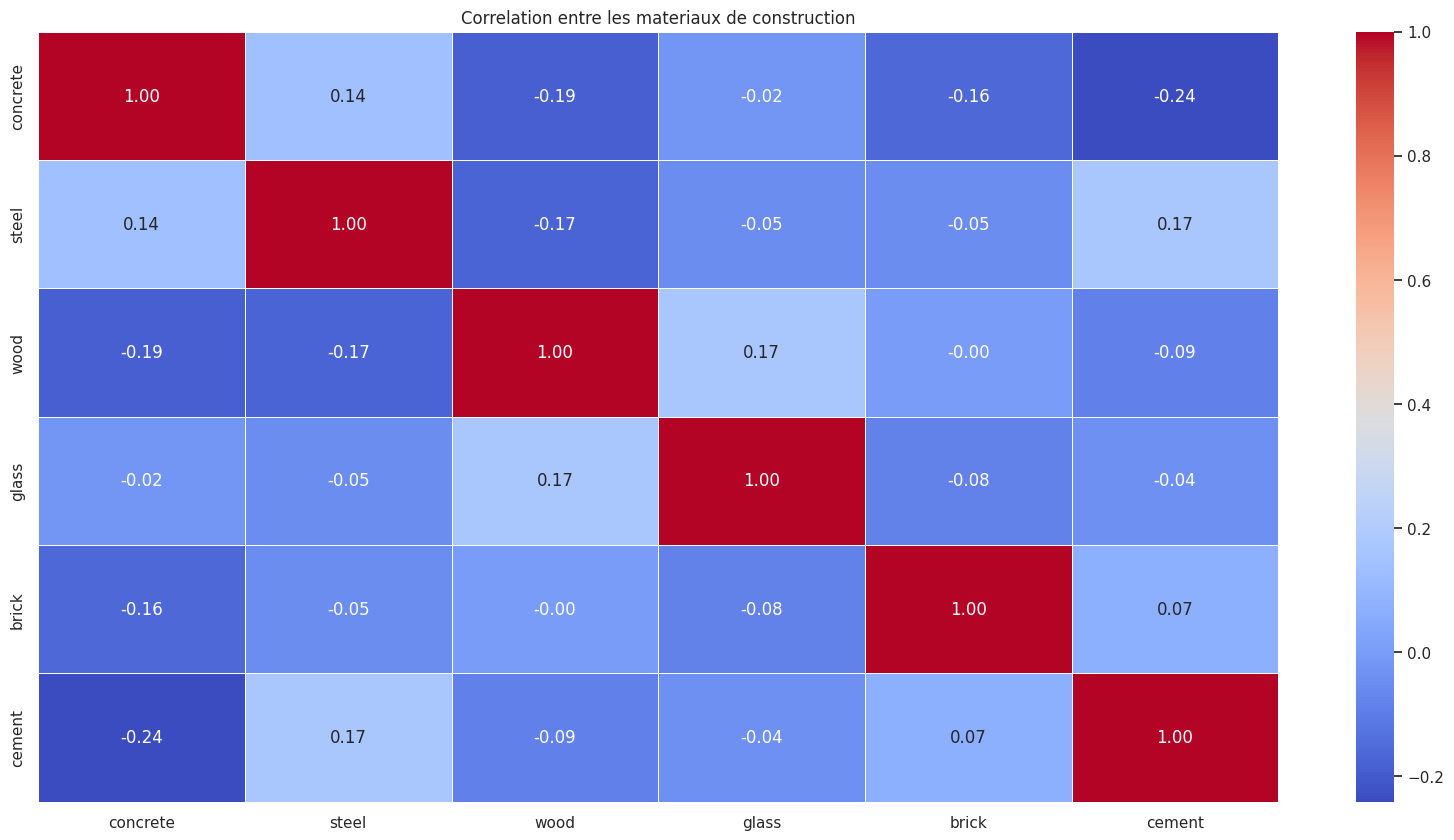

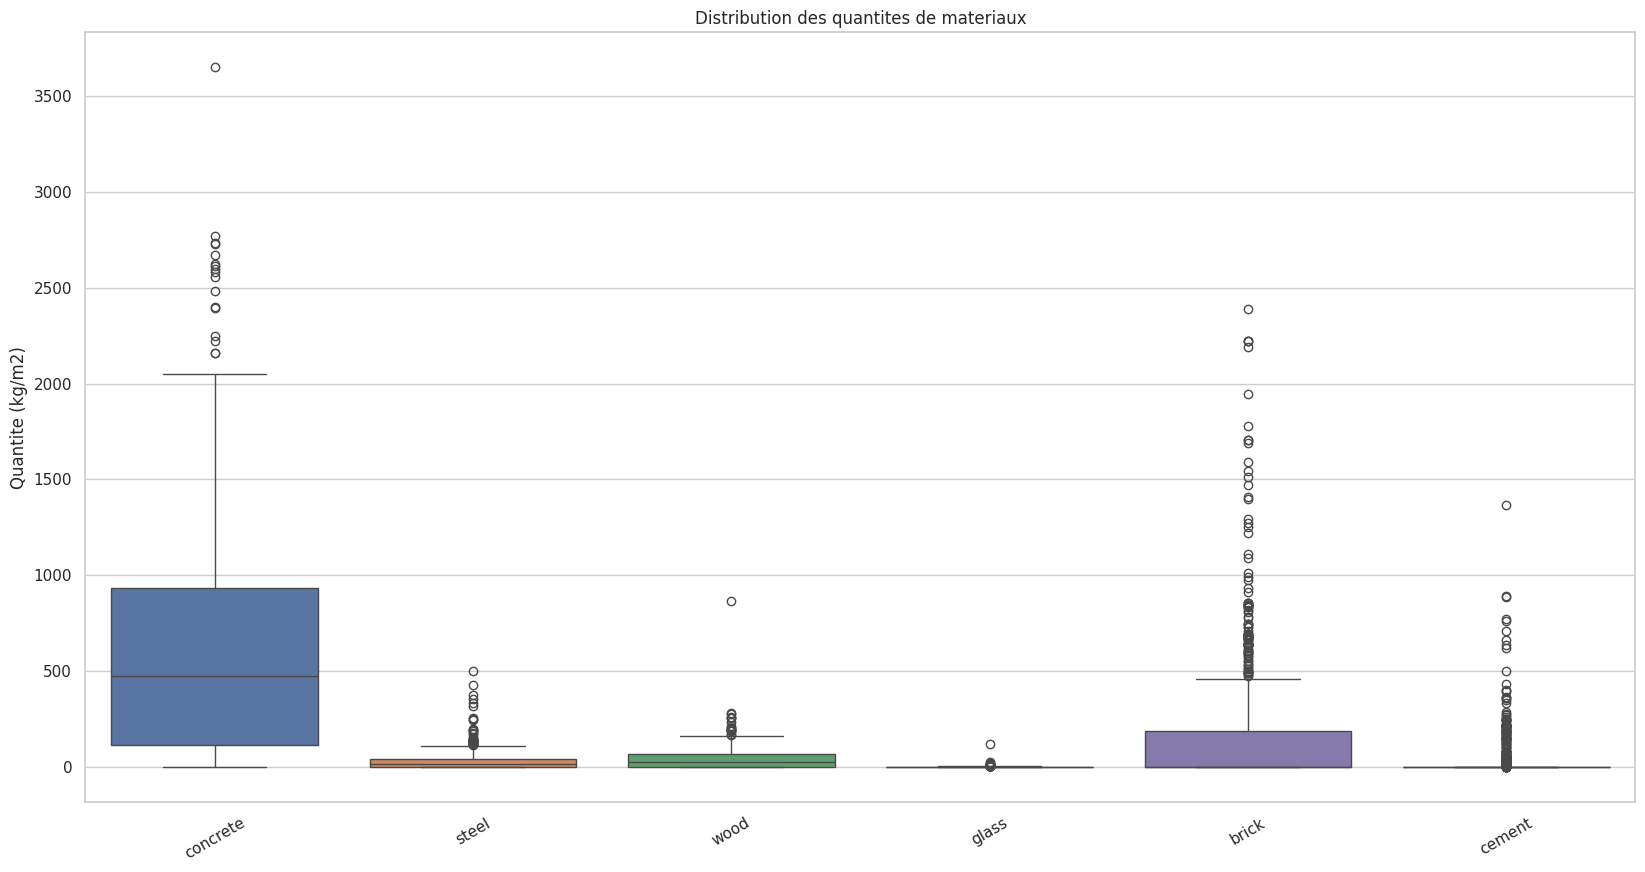

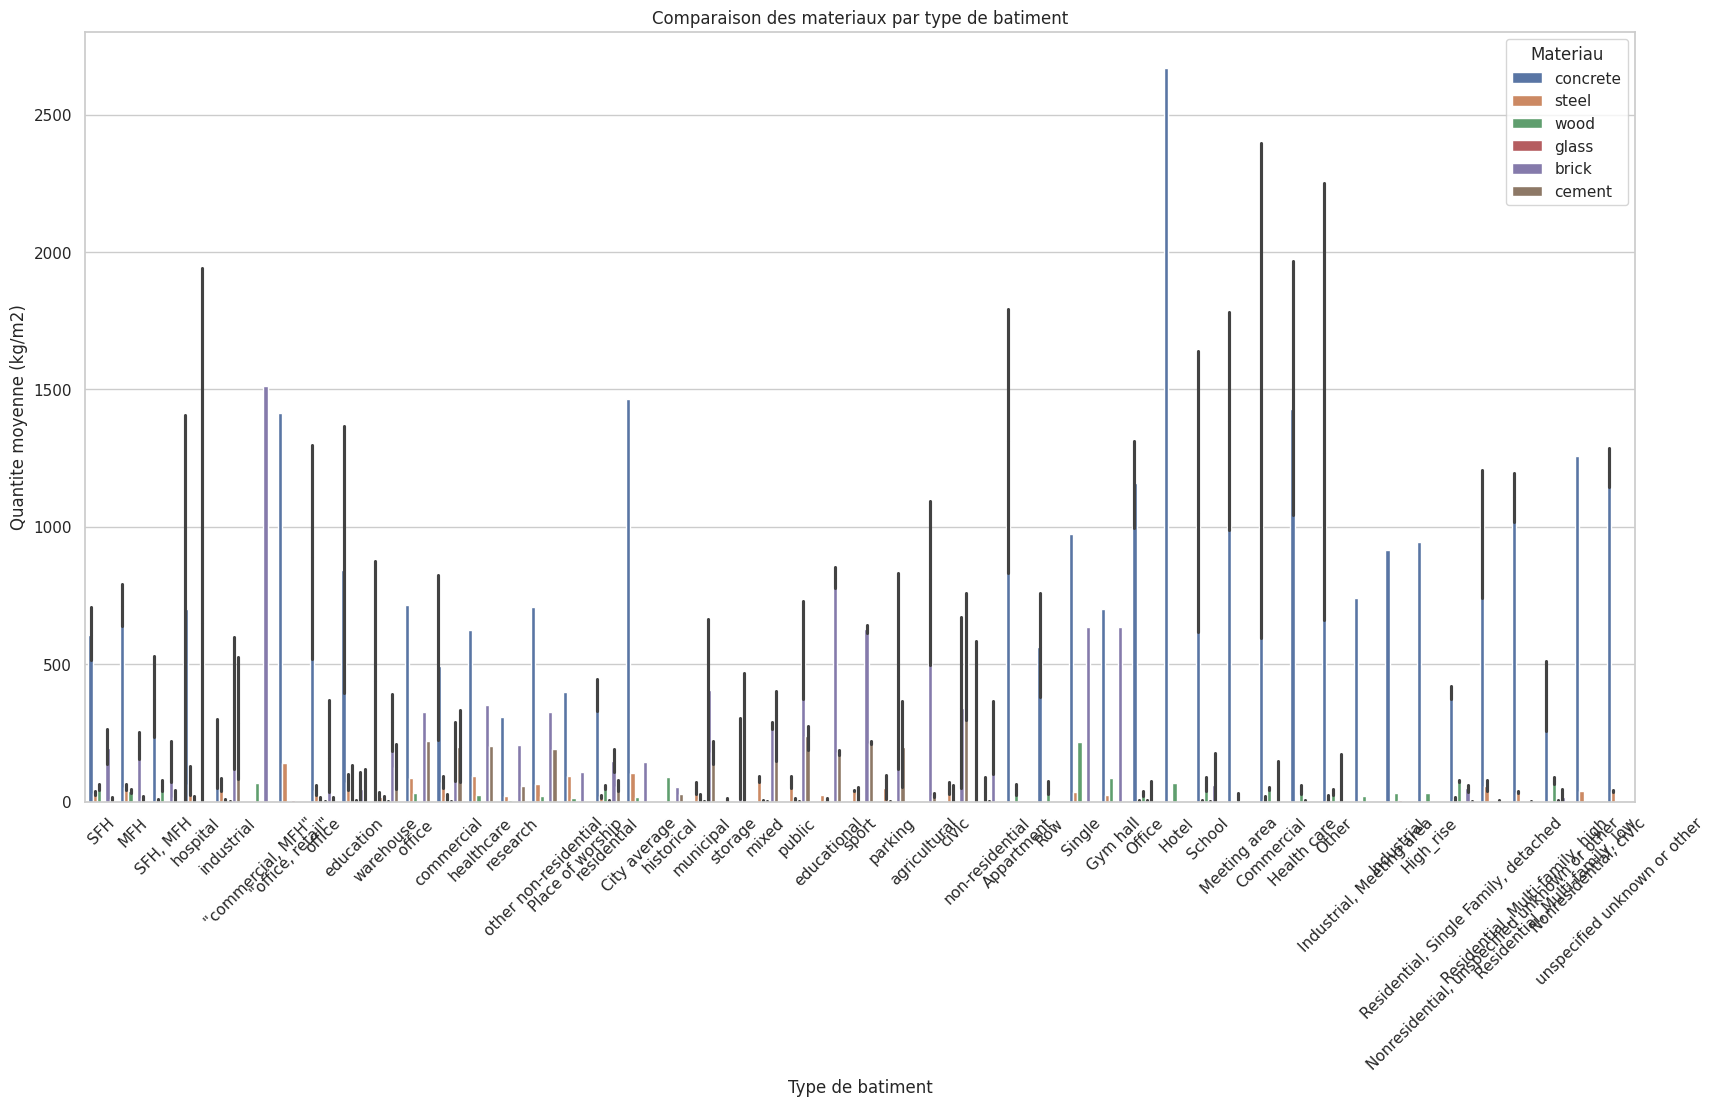


Etape finale : fichier 'resultats_analyse_recherche.xlsx' genere avec succes


In [ ]:

# =====================================================
# 1. LIBRAIRIES & ENVIRONNEMENT
# =====================================================
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import gdown

sns.set(style="whitegrid")  # style propre pour les graphiques


# =====================================================
# FONCTION AJOUTEE (POUR RESPECTER LE CAHIER DES CHARGES)
# =====================================================

def nettoyer_donnees(df, colonnes_materiaux):
    for col in colonnes_materiaux:
        if col in df.columns:
            df[col] = pd.to_numeric(df[col], errors='coerce')

    df[colonnes_materiaux] = df[colonnes_materiaux].fillna(0)
    df = df.dropna(subset=['country', 'building_type'])
    return df


# =====================================================
# 2. CHARGEMENT DES DONNEES (Google Drive -> Python)
# =====================================================

# ID du fichier Google Drive
file_id = "1LCDWNMmK5LDfnLK_f6yRwpeWF6kXE2DV"
url = f"https://drive.google.com/uc?id={file_id}"
output = "buildings.csv"

# Telechargement du fichier
gdown.download(url, output, quiet=False)

# Lecture du fichier avec encodage adapte
try:
    df = pd.read_csv(output, encoding="ISO-8859-1")
    print("Etape 1 : Fichier charge avec succes")
except Exception as e:
    raise RuntimeError(f"Erreur lors du chargement : {e}")

# Apercu initial
print("\n--- Apercu des donnees ---")
print(df.head())


# =====================================================
# 3. NETTOYAGE ET PREPARATION DES DONNEES
# =====================================================

print("\n--- Nettoyage des donnees ---")

# Colonnes representant les materiaux de construction
colonnes_materiaux = ['concrete', 'steel', 'wood', 'glass', 'brick', 'cement']

# Remplacement minimal : appel de la fonction
df = nettoyer_donnees(df, colonnes_materiaux)

print("Etape 2 : Donnees nettoyees et pretes pour l'analyse")


# =====================================================
# 4. ANALYSE STATISTIQUE DES MATERIAUX
# =====================================================

print("\n--- Analyse statistique ---")

resume_beton = (
    df.groupby('building_type')['concrete']
    .mean()
    .sort_values(ascending=False)
)

print("\nIntensite moyenne de beton (kg/m2) par type :")
print(resume_beton)

resume_global = df[colonnes_materiaux].describe()
print("\nStatistiques globales des materiaux :")
print(resume_global)


# =====================================================
# 5. VISUALISATIONS
# =====================================================

plt.figure(figsize=(20, 10))
sns.barplot(
    x=resume_beton.values,
    y=resume_beton.index
)
plt.title("Consommation moyenne de beton par type de batiment")
plt.xlabel("Moyenne (kg/m2)")
plt.ylabel("Type de batiment")
plt.show()

plt.figure(figsize=(20, 10))
correlation = df[colonnes_materiaux].corr()
sns.heatmap(
    correlation,
    annot=True,
    cmap="coolwarm",
    fmt=".2f",
    linewidths=0.5
)
plt.title("Correlation entre les materiaux de construction")
plt.show()

plt.figure(figsize=(20, 10))
sns.boxplot(data=df[colonnes_materiaux])
plt.title("Distribution des quantites de materiaux")
plt.ylabel("Quantite (kg/m2)")
plt.xticks(rotation=30)
plt.show()

df_melted = df.melt(
    id_vars="building_type",
    value_vars=colonnes_materiaux,
    var_name="Materiau",
    value_name="Quantite"
)

plt.figure(figsize=(20, 10))
sns.barplot(
    data=df_melted,
    x="building_type",
    y="Quantite",
    hue="Materiau"
)
plt.title("Comparaison des materiaux par type de batiment")
plt.xlabel("Type de batiment")
plt.ylabel("Quantite moyenne (kg/m2)")
plt.xticks(rotation=45)
plt.legend(title="Materiau")
plt.show()


# =====================================================
# 6. SAUVEGARDE DES RESULTATS
# =====================================================

nom_sortie = "resultats_analyse_recherche.xlsx"
df.to_excel(nom_sortie, index=False)

print(f"\nEtape finale : fichier '{nom_sortie}' genere avec succes")